# Polynomial Regression

In [4]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = [
    [1, 50, 3.3],
    [2, 50, 2.8],
    [3, 50, 2.9],
    [4, 70, 2.3],
    [5, 70, 2.6],
    [6, 70, 2.1],
    [7, 80, 2.5],
    [8, 80, 2.9],
    [9, 80, 2.4],
    [10, 90, 3.0],
    [11, 90, 3.1],
    [12, 90, 2.8],
    [13, 100, 3.3],
    [14, 100, 3.5],
    [15, 100, 3.0]
]

csv_file_path = 'yielddata.csv'
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['i', 'Temp.', 'Yield'])
    writer.writerows(data)

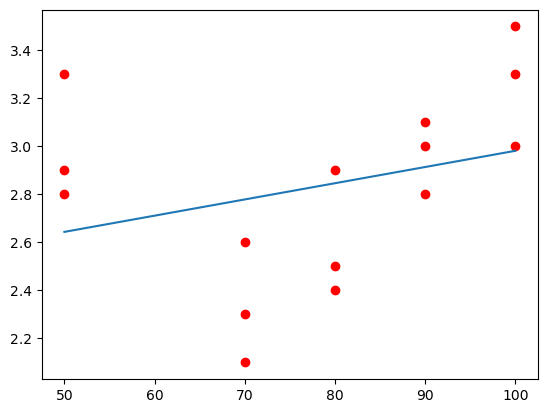

In [26]:
#Linear

data = pd.read_csv("yielddata.csv")

x = np.array(data['Temp.'])
y = np.array(data['Yield'])


X = np.array([[len(x), np.sum(x)], [np.sum(x), np.sum(x*x)]])
Y = np.array([np.sum(y), np.sum(x*y)])
b = np.dot(np.linalg.inv(X), Y)
ypredlin = b[0] + b[1]*x

plt.plot(x, ypredlin)
plt.scatter(x, y, color='red')
plt.show()

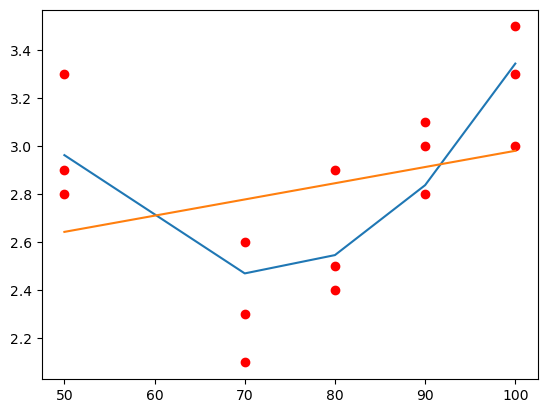

In [27]:
#Polynomial

data = pd.read_csv("yielddata.csv")

x = np.array(data['Temp.'])
y = np.array(data['Yield'])


X = np.array([[len(x), np.sum(x), np.sum(x*x)], 
              [np.sum(x), np.sum(x**2), np.sum(x**3)], 
              [np.sum(x**2), np.sum(x**3), np.sum(x**4)]])

Y = np.array([np.sum(y), np.sum(x*y), np.sum(x*x*y)])
b = np.dot(np.linalg.inv(X), Y)
ypred = b[0] + b[1]*x + b[2]*x**2

plt.plot(x, ypred)
plt.plot(x, ypredlin)
plt.scatter(x, y, color='red')
plt.show()

In [25]:
# print(X)
# print(Y)
print(b)

[ 7.96048110e+00 -1.53711340e-01  1.07560137e-03]


In [29]:
rmse = np.mean((abs(y - ypred)))
print(rmse)
print(rmse ** 2)

0.18593356242827233
0.03457128963726824


# Multiple regression

In [37]:
df = pd.read_csv("heart.csv")
df.head()

,Infarc,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0


In [41]:
y = np.array(df['Infarc'].values)
x1 = np.array(df['Area'].values)
x2 = np.array(df['X2'].values)
x3 = np.array(df['X3'].values)

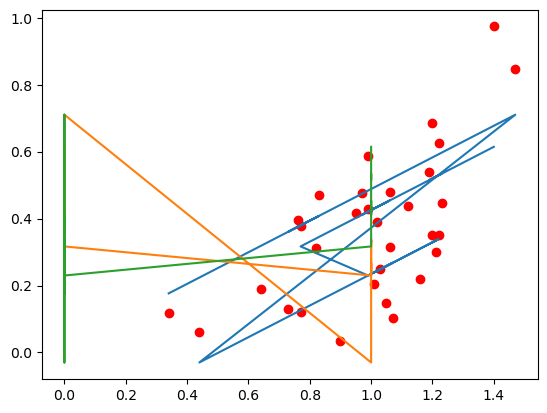

In [58]:
#Multiple
X = np.array([[len(x), np.sum(x1),np.sum(x2),np.sum(x3)],
              [np.sum(x1), np.sum(x1*x1),np.sum(x1*x2),np.sum(x1*x3)],
             [np.sum(x2),np.sum(x2*x1),np.sum(x2*x2),np.sum(x2*x3)],
             [np.sum(x3),np.sum(x3*x1),np.sum(x3*x2), np.sum(x3*x3)]])

Y = np.array([np.sum(y), np.sum(x1*y),np.sum(x2*y),np.sum(x3*y)])
b = np.dot(np.linalg.inv(X), Y)
ypred = b[0] + b[1]*x1 + b[2]*x2 + b[3]*x3

plt.plot(x1, ypred)
plt.plot(x2, ypred)
plt.plot(x3, ypred)
plt.scatter(x1, y, color='red')
plt.show()

In [63]:
rmse = np.mean((abs(y - ypred)))
print(rmse)
print(rmse ** 2)

0.0971039345685534
0.0094291741086939


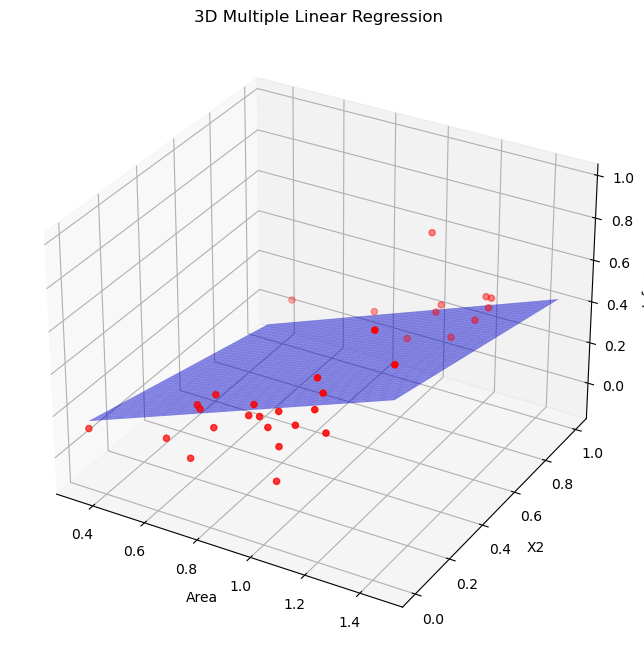

In [52]:
# Create a meshgrid for x1 and x2
x1_range = np.linspace(np.min(x1), np.max(x1), 50)
x2_range = np.linspace(np.min(x2), np.max(x2), 50)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

# Compute the predicted values for the meshgrid
x3_mean = np.mean(x3)
ypred_mesh = b[0] + b[1]*x1_mesh + b[2]*x2_mesh + b[3]*x3_mean

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x1, x2, y, color='red', label='Data Points')

# Surface plot
ax.plot_surface(x1_mesh, x2_mesh, ypred_mesh, color='blue', alpha=0.5)

ax.set_xlabel('Area')
ax.set_ylabel('X2')
ax.set_zlabel('Infarc')
ax.set_title('3D Multiple Linear Regression')

plt.show()

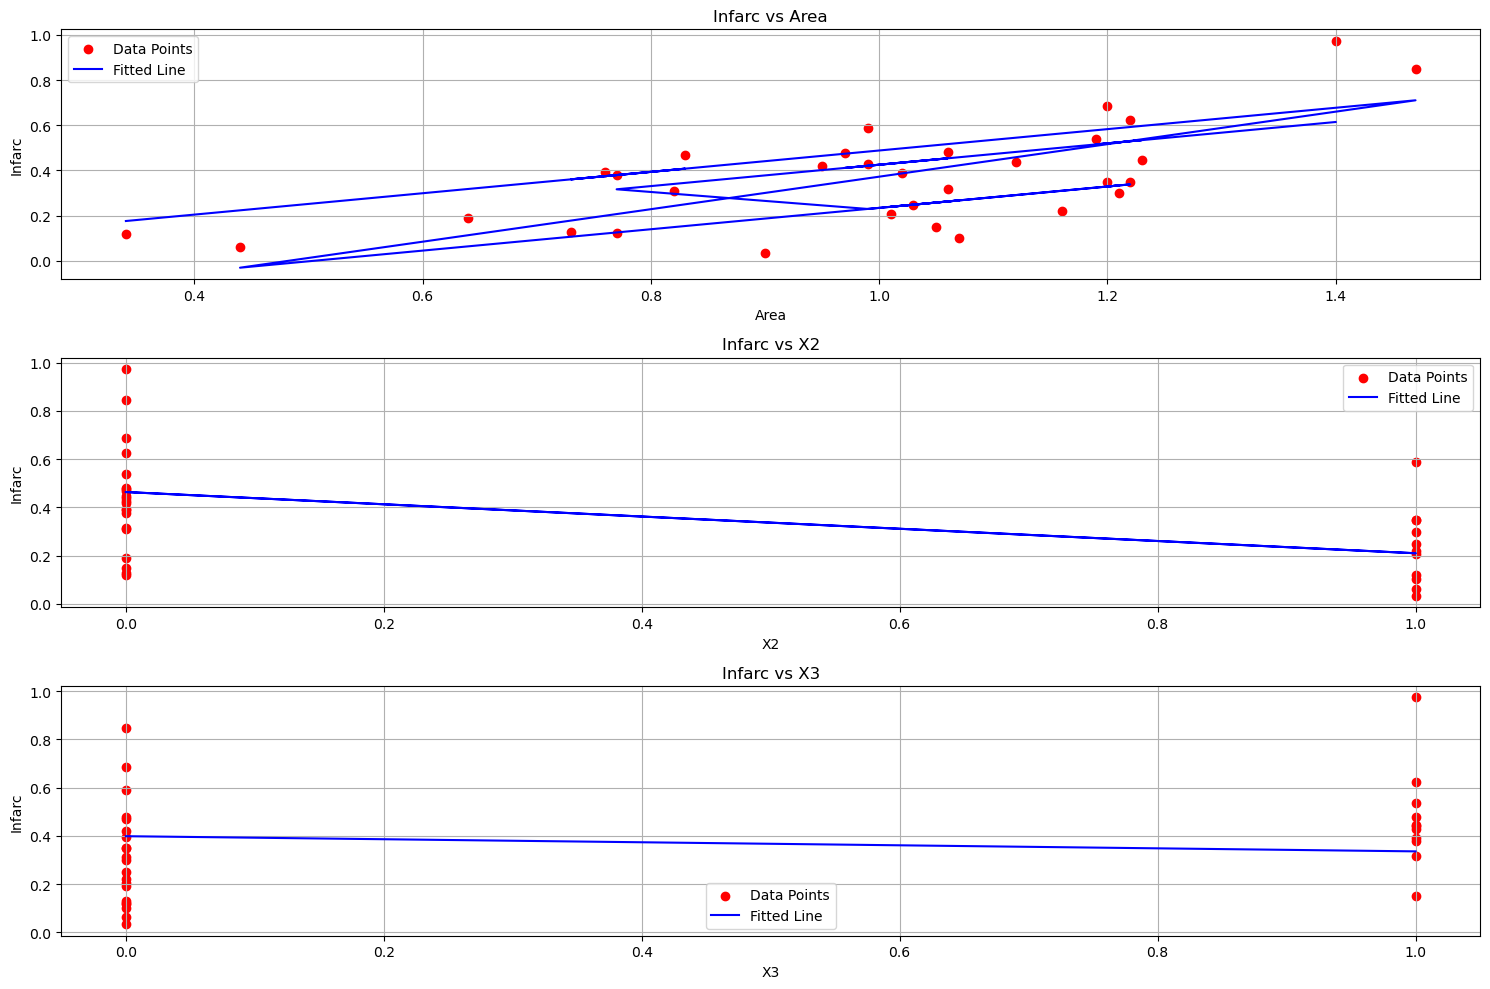

In [59]:
# Create subplots
plt.figure(figsize=(15, 10))

# Plot for x1
plt.subplot(3, 1, 1)
plt.scatter(x1, y, color='red', label='Data Points')
plt.plot(x1, ypred, label='Fitted Line', color='blue')
plt.xlabel('Area')
plt.ylabel('Infarc')
plt.title('Infarc vs Area')
plt.legend()
plt.grid(True)

# Plot for x2
plt.subplot(3, 1, 2)
plt.scatter(x2, y, color='red', label='Data Points')
ypred_x2 = b[0] + b[1]*np.mean(x1) + b[2]*x2 + b[3]*np.mean(x3)
plt.plot(x2, ypred_x2, label='Fitted Line', color='blue')
plt.xlabel('X2')
plt.ylabel('Infarc')
plt.title('Infarc vs X2')
plt.legend()
plt.grid(True)

# Plot for x3
plt.subplot(3, 1, 3)
plt.scatter(x3, y, color='red', label='Data Points')
ypred_x3 = b[0] + b[1]*np.mean(x1) + b[2]*np.mean(x2) + b[3]*x3
plt.plot(x3, ypred_x3, label='Fitted Line', color='blue')
plt.xlabel('X3')
plt.ylabel('Infarc')
plt.title('Infarc vs X3')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
